    X    Y
0  24 -302
1  24 -303
2  24 -304
3  24 -305
4  24 -306
5  25 -311
6  25 -312
7  27 -308
8  27 -298
9  27 -310
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
appe

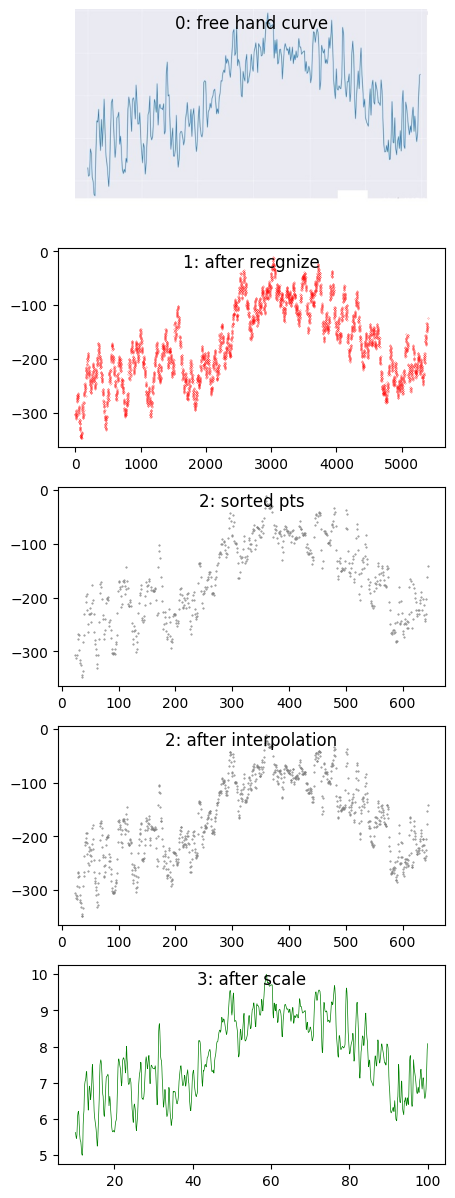

In [25]:
import pandas as pd
import scipy
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from skimage.morphology import skeletonize
from skimage.util import invert
from IPython.display import display, clear_output
import random
from scipy import interpolate
import sys
scipy.__version__

path='C:\\WangJian\\PY\\Longchain RAG\\'
file_name='webpage2.jpg'
# sys.exit()
image_file = path+file_name
max_points=1000 # by default, system will generate ~5000 points

threshold=128  
image = Image.open(image_file)  # Load the image
gray_image = image.convert('L')  # Convert to grayscale

# Apply binary threshold
binary_image = gray_image.point(lambda p: p > threshold and 255)

# Convert binary image to numpy array
binary_array = np.array(binary_image)

# Invert binary array (PIL uses 255 for white and 0 for black, we need 1 for white and 0 for black)
binary_array = np.where(binary_array == 255, 0, 1)

thinned_array = skeletonize(binary_array)

# Get coordinates of non-zero points (the thinned curve)
curve_coordinates = np.column_stack(np.where(thinned_array == 1))
    
# #========================limit points count to max_points===============================
# if len(curve_coordinates) > max_points:
#     # by default, system will generate ~5000 points
#     curve_coordinates = random.sample(list(curve_coordinates), max_points)
# #=========================limit points count to max_points===============================

#=========================write coordinate to dataframe=================================
coordinates=curve_coordinates
list_x=[]
list_y=[]
for point in coordinates:
    list_x.append(point[1])
    list_y.append(-point[0])

dict = {'X': list_x, 'Y': list_y} 
df = pd.DataFrame(dict) 
df=df.sort_values(by="X", ascending=True)
# print('check x column:  ', df['X'].unique())
df.to_csv(path+'recged_pts.csv', index=False)

#=============================remove extra y values===============================================
df=pd.read_csv(path+'recged_pts.csv',index_col=False)
print(df.head(10))
list_x=[]
list_y=[]
for i in range(0,len(df)-1,1): 
        next_x=df['X'][i+1]
        # print(last_x, current_x, next_x)
        # df['X'][i]!=df['X'][i+1]:
        if df['X'][i]!=next_x:
            list_x.append(df['X'][i])
            list_y.append(df['Y'][i])
            print('append')

    
dict = {'X': list_x, 'Y': list_y} 
df = pd.DataFrame(dict) 
# print('check x column:  ', df['X'].unique())
df.to_csv(path+'sorted_pts.csv', index=False)



# ===============================2d point interpolation==========================================
x_start=10
x_end=100
x_step=900+1 # number of points
y_start=5
y_end=10

df=pd.read_csv(path+'sorted_pts.csv', index_col=False)

x_array = df['X'].to_numpy()
y_array = df['Y'].to_numpy()
# plt.scatter(x_array, y_array,color='red', marker='o', s=5.5)

x_new = np.linspace(x_array.min(), x_array.max(), x_step) #

#for n in ['linear','zero', 'slinear', 'quadratic', 'cubic', 4, 5]
f = interpolate.interp1d(x_array, y_array,kind="cubic") 
y_new=f(x_new) #通过相应的插值函数求得新的函数点
# print('type y_new=================:    ',type(y_new))
dict = {'X': x_new.tolist(), 'Y': y_new.tolist()} 
df = pd.DataFrame(dict) 
df.to_csv(path+'after_interpolation.csv', index=False)

# ================================scale x, y axis==============================
df=pd.read_csv(path+'after_interpolation.csv', index_col=False)
x_new=df['X'].to_numpy()
y_new=df['Y'].to_numpy()
# scale Y array and collected by a list
new_list_y=[]
for i in y_new: 
    ratio = (i - y_new.min()) / (y_new.max() - y_new.min())
    X_scaled = ratio * (y_end - y_start) + y_start
    new_list_y.append(X_scaled)
y_new_scaled=np.array(new_list_y)

# scale X array and collected by a list
new_list_x=[]
for i in x_new: 
    ratio = (i - x_new.min()) / (x_new.max() - x_new.min())
    X_scaled = ratio * (x_end - x_start) + x_start
    new_list_x.append(X_scaled)
x_new_scaled=np.array(new_list_x)

dict = {'X': new_list_x, 'Y': new_list_y} 
df = pd.DataFrame(dict) 
df.to_csv(path+'after_scale.csv', index=False)


# ===========================plot=============================
fig, axs = plt.subplots(5, 1)
fig.set_size_inches(5, 15)
# plt.rcParams["figure.figsize"] = (12,6)
fig.set_dpi(100)

image_file = path+file_name
image = Image.open(image_file)  # Load the image
axs[0].imshow(image)
axs[0].set_title('0: free hand curve',y=1.0, pad=-14)
axs[0].axis('off')

df=pd.read_csv(path+'recged_pts.csv', index_col=False)
axs[1].scatter(df['X'].index, df['Y'],color='red', marker='.', s=0.1) 
axs[1].set_title('1: after recgnize',y=1.0, pad=-14)

df=pd.read_csv(path+'sorted_pts.csv', index_col=False)
axs[2].scatter(df['X'], df['Y'],color='grey',marker='o', s=0.2)
axs[2].set_title('2: sorted pts',y=1.0, pad=-14)

df=pd.read_csv(path+'after_interpolation.csv', index_col=False)
axs[3].scatter(df['X'], df['Y'],color='grey',marker='o', s=0.2)
axs[3].set_title('2: after interpolation',y=1.0, pad=-14)


df=pd.read_csv(path+'after_scale.csv', index_col=False)
axs[4].plot(df['X'], df['Y'],color='green', linewidth=0.5)
axs[4].set_title('3: after scale',y=1.0, pad=-14)

plt.show()


    



